# MNIST Fashion Conv Neural Network

## Paso 1: Bajar el dataset

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Load the fashion MINST dataset
fashion_minst = tf.keras.datasets.fashion_mnist

# We will generate a training set and a test set
(train_images, train_labels), (test_images, test_labels) = fashion_minst.load_data()

2.20.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Paso 2: Entender el dataset

In [5]:
# Print the shape of the training data
print("Training data shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
train_labels

Training data shape: (60000, 28, 28)
Train labels shape: (60000,)


array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

In [6]:
# Rescale the image values to a range of 0 to 1 before feeding them to the neural network model.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Define the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

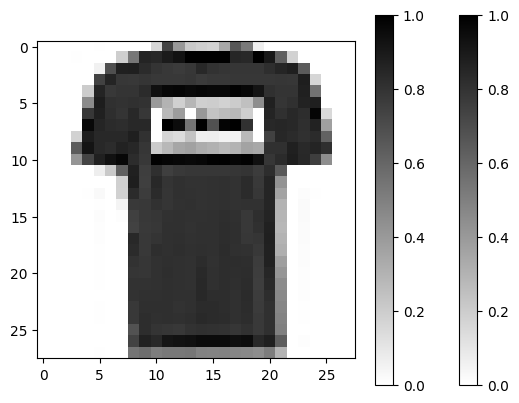

In [11]:
#Display som of the images
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()

plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.colorbar()

## Paso 3: Normalizar imágenes

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

## Paso 4: Diseñar 3 arquitecturas

In [12]:
denseModel = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Arquitecture 2
convModel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Arquitecture 3
deepConvModel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\Pansocrates03\Documents\7mo Semestre\DEEP LEARNING\act4\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Pansocrates03\Documents\7mo Semestre\DEEP LEARNING\act4\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Paso 5: Compilar entrenar y evaluar las arquitecturas

In [13]:
# Compile the models
denseModel.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

convModel.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

deepConvModel.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Reshape the data for Conv2D layers
train_images_reshaped = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_reshaped = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Train the models
denseModel.fit(train_images, train_labels, epochs=10)
convModel.fit(train_images_reshaped, train_labels, epochs=10)
deepConvModel.fit(train_images_reshaped, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8262 - loss: 0.4874
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8673 - loss: 0.3619
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8796 - loss: 0.3250
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8868 - loss: 0.3055
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8917 - loss: 0.2904
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8978 - loss: 0.2737
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9017 - loss: 0.2614
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9061 - loss: 0.2507
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9093 - loss: 0.2397
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9133 - loss: 0.2303
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8330 - loss: 0.4631
Epoch 2/10
1875/1875 ━━━━━━━

## Paso 6: Comparar modelos y proveer conclusiones